# VGG

## Import libraries

In [80]:
import keras
from keras.datasets import cifar10
from keras.models import Sequential
from keras.layers import Dense, Flatten, Dropout
from keras.layers import Conv2D, MaxPooling2D
import numpy as np
from collections import Counter
import matplotlib.pyplot as plt
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from keras.preprocessing.image import ImageDataGenerator
from keras import initializers, regularizers

In [81]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

## Basic data statistics

In [82]:
num_of_classes = np.unique(y_train).shape[0]
print("Number of training examples: ", X_train.shape[0])
print("Number of testing examples: ", X_test.shape[0])
print("Shape of input images: ", X_train.shape[1:])
print("Data type: ", X_train.dtype)
print("Number of classes: ", num_of_classes)

Number of training examples:  50000
Number of testing examples:  10000
Shape of input images:  (32, 32, 3)
Data type:  uint8
Number of classes:  10


## Pixel wise standardization

In [83]:
pixel_mean = X_train.mean(axis=0)
pixel_std = X_train.std(axis=0) + 1e-10 #prevents division by zero-error
# piwel-wise normalization on the train and test set
X_train = (X_train - pixel_mean) / pixel_std
X_test = (X_test - pixel_mean) / pixel_std

## To_categoriacal

In [84]:
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

## Change data shape

In [85]:
X_train = X_train.astype(np.float32)
X_test = X_test.astype(np.float32)

## Spit data 

In [86]:
seed = 7
np.random.seed(seed)

X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=seed)

print("Training set shape: ", X_train.shape)
print("Validation set shape: ", X_val.shape)
print("Testing set shape: ", X_test.shape)

Training set shape:  (40000, 32, 32, 3)
Validation set shape:  (10000, 32, 32, 3)
Testing set shape:  (10000, 32, 32, 3)


## Perform some data augmentation

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


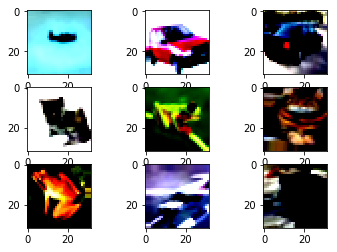

In [87]:
datagen = ImageDataGenerator(width_shift_range=0.1,
                            height_shift_range=0.1,
                            horizontal_flip=True,
                            rotation_range=15,
                            fill_mode="nearest")

datagen.fit(X_train)
for X_batch, y_batch in datagen.flow(X_train, y_train, batch_size=9):
    for i in range(0, 9):
        plt.subplot(330 + 1 + i)
        plt.imshow(X_batch[i].reshape(32, 32,3))
    plt.show()
    break

## Build model

In [88]:
print(X_train.shape)

vgg = keras.applications.vgg16.VGG16(include_top=False,
weights='imagenet',
input_shape=X_train.shape[1:])


for layer in vgg.layers[:-2]:
    layer.trainable = False
    
model = Sequential()
model.add(vgg)
##model.add(Conv2D(64, (5,5), activation='relu'))
##model.add(MaxPooling2D((2, 2), strides=(2, 2)))
model.add(Flatten())
##model.add(Dense(256, activation="relu"))
#model.add(Dropout(0.3))
model.add(Dense(10, activation="softmax"))

(40000, 32, 32, 3)


## Compile model

In [89]:
adam = keras.optimizers.Adam(lr=0.00033, epsilon=1e-4)

model.compile(optimizer=adam, loss="categorical_crossentropy", metrics=['accuracy'],)

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 1, 1, 512)         14714688  
_________________________________________________________________
flatten_7 (Flatten)          (None, 512)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 10)                5130      
Total params: 14,719,818
Trainable params: 2,364,938
Non-trainable params: 12,354,880
_________________________________________________________________


## Train the model on images with slight augmentation

In [90]:
model.fit_generator(datagen.flow(X_train, y_train, batch_size=32),
                   epochs=10,
                   steps_per_epoch=len(X_train)/64,
                   validation_data=(X_val, y_val),
                   verbose=1)

Epoch 1/10
625/625 [==============================] - 85s 137ms/step - loss: 1.2133 - acc: 0.5770 - val_loss: 1.0023 - val_acc: 0.6550
Epoch 2/10
625/625 [==============================] - 85s 137ms/step - loss: 1.0504 - acc: 0.6288 - val_loss: 0.9187 - val_acc: 0.6817
Epoch 3/10
625/625 [==============================] - 86s 137ms/step - loss: 0.9543 - acc: 0.6642 - val_loss: 0.9725 - val_acc: 0.6748
Epoch 4/10
625/625 [==============================] - 87s 138ms/step - loss: 0.9437 - acc: 0.6659 - val_loss: 0.9345 - val_acc: 0.6816
Epoch 5/10
625/625 [==============================] - 87s 138ms/step - loss: 0.8857 - acc: 0.6912 - val_loss: 0.8823 - val_acc: 0.6954
Epoch 6/10
625/625 [==============================] - 87s 140ms/step - loss: 0.8887 - acc: 0.6876 - val_loss: 0.8849 - val_acc: 0.6884
Epoch 7/10
625/625 [==============================] - 89s 143ms/step - loss: 0.8447 - acc: 0.7034 - val_loss: 0.8694 - val_acc: 0.7011
Epoch 8/10
625/625 [==============================] - 9

## Test loss and accuracy

In [91]:
test_loss, test_acc = model.evaluate(X_test, y_test)
print("Test loss: ", test_loss)
print("Test acc: ", test_acc)

10000/10000 [==============================] - 25s 2ms/step
Test loss:  0.8236497344970704
Test acc:  0.7163


## Visualise and analyze

#### Loss

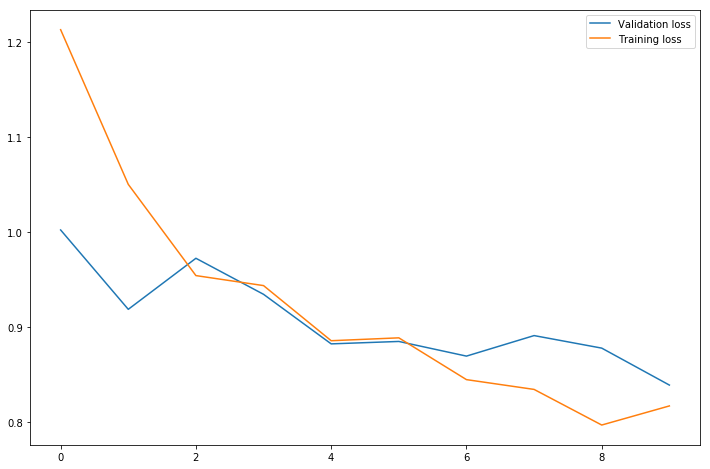

In [92]:
history = model.history.history
plt.figure(figsize=(12, 8))
plt.plot(history["val_loss"], label="Validation loss")
plt.plot(history["loss"], label="Training loss")

plt.legend()

#### Accuracy

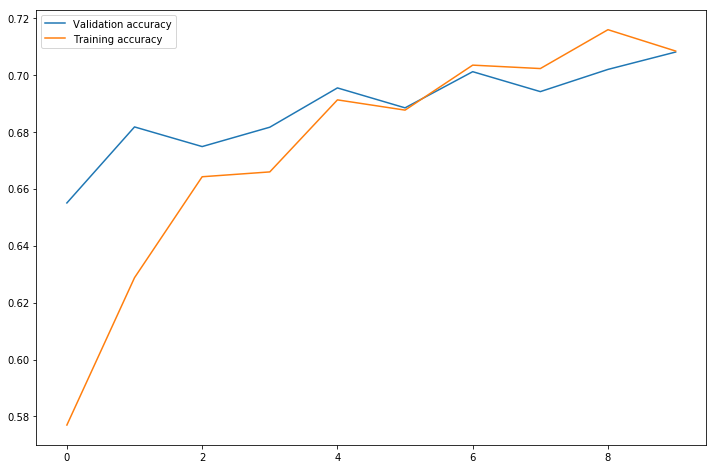

In [93]:
plt.figure(figsize=(12, 8))
plt.plot(history["val_acc"], label="Validation accuracy")
plt.plot(history["acc"], label="Training accuracy")

plt.legend()

### Classification report

In [94]:
from sklearn.metrics import classification_report

predicted = model.predict(X_test)
target_names = ["airplane", "automobile", "bird", "cat", "deer", "dog", "frog", "horse", "ship", "truck"]
report = classification_report(y_test.argmax(axis=1), predicted.argmax(axis=1), target_names=target_names)
print(report)



             precision    recall  f1-score   support

   airplane       0.69      0.81      0.75      1000
 automobile       0.81      0.81      0.81      1000
       bird       0.71      0.61      0.66      1000
        cat       0.66      0.41      0.50      1000
       deer       0.69      0.61      0.65      1000
        dog       0.61      0.68      0.64      1000
       frog       0.69      0.84      0.76      1000
      horse       0.73      0.81      0.77      1000
       ship       0.88      0.73      0.80      1000
      truck       0.71      0.85      0.77      1000

avg / total       0.72      0.72      0.71     10000

